In [2]:
def get_tyre(img):
    gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur_img=cv2.medianBlur(gray_img,5)
    rows=blur_img.shape[0]
    circles=cv2.HoughCircles(blur_img, cv2.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=1, maxRadius=300)
    print(circles)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(img, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv2.circle(img, center, radius, (255, 0, 255), 3)
    return img

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
cap=cv2.VideoCapture('los_angeles.mp4')
img=cap.read()[1]

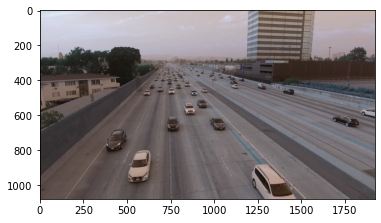

In [5]:
plt.imshow(img)

In [6]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur_img=cv2.medianBlur(gray_img,5)
rows=blur_img.shape[0]

In [7]:
circles=cv2.HoughCircles(blur_img, cv2.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=1, maxRadius=30)

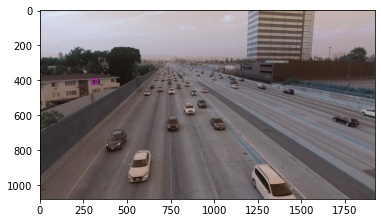

In [8]:
if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(img, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv2.circle(img, center, radius, (255, 0, 255), 3)

plt.imshow(img)

In [9]:
cap=cv2.VideoCapture('los_angeles.mp4')
img=cap.read()[1]

from object_detection import ObjectDetection
od = ObjectDetection()

detections=[]
(class_ids, scores, boxes) = od.detect(img)
for box in boxes:
    (x, y, w, h) = box
    detections.append([x,y,w,h])

Loading Object Detection
Running opencv dnn with YOLOv4


In [10]:
#x,y,w,h=detections[0]
#roi=img[y:y+h,x:x+h]
#tyre_roi=get_tyre(roi)
#plt.imshow(tyre_roi)

In [11]:
detections

[[505, 802, 133, 178],
 [376, 683, 122, 118],
 [1671, 603, 159, 64],
 [727, 605, 69, 87],
 [972, 610, 93, 74],
 [898, 507, 61, 52],
 [826, 531, 61, 69],
 [592, 457, 40, 32],
 [862, 457, 39, 32],
 [1214, 881, 245, 198],
 [735, 445, 36, 37],
 [1100, 424, 37, 25],
 [924, 444, 37, 29],
 [1835, 560, 85, 90],
 [628, 423, 29, 25],
 [672, 433, 33, 35],
 [1243, 413, 51, 40],
 [1389, 450, 70, 32]]

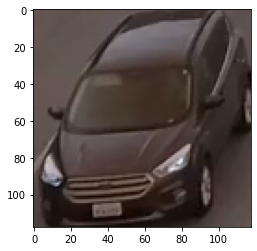

In [12]:
cap=cv2.VideoCapture('los_angeles.mp4')
img=cap.read()[1]
x,y,w,h=detections[1]
roi=img[y:y+h,x:x+h]
plt.imshow(roi)

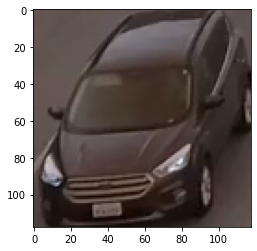

In [13]:
plt.imshow(roi)

In [14]:
import cv2
import numpy as np
import glob
import random
import matplotlib.pyplot as plt

# Load Yolo
net = cv2.dnn.readNet("yolov3_training_last.weights", "yolov3_testing.cfg")

# Name custom object
classes = ["Tyre"]

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

img_with_tyre_pred = roi.copy()
#img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img_with_tyre_pred.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img_with_tyre_pred, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.3:
            # Object detected
            print(class_id)
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(img_with_tyre_pred, (x, y), (x + w, y + h), color, 2)
        #cv2.putText(img, label, (x, y + 30), font, 3, color, 2)


cv2.imshow("Image", img_with_tyre_pred)
key = cv2.waitKey(0)
if key==27:
    cv2.destroyAllWindows()

0
[[0]]


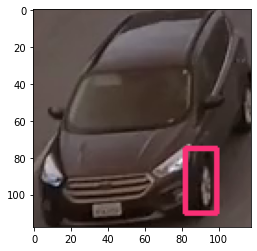

In [26]:
plt.imshow(img_with_tyre_pred)

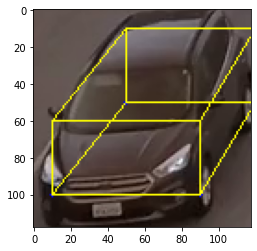

In [16]:
cap=cv2.VideoCapture('los_angeles.mp4')
import copy
img=cap.read()[1]
x,y,w,h=detections[1]
roi_c=copy.deepcopy(roi)
roi=img[y:y+h,x:x+h]
t1,t2,t3,t4=(10,100),(90,100),(120,50),(50,50)
a5,a6,a7,a8=(10,60),(90,60),(120,10),(50,10)
cv2.circle(roi,t2,1,(0,0,255))
cv2.circle(roi,t1,1,(0,0,255))
cv2.circle(roi,t3,1,(0,0,255))
cv2.circle(roi,t4,1,(0,0,255))
cv2.polylines(roi,np.array([[t1,t2,t3,t4,t1,a5,a6,a7,a8,a5,a6,t2,t3,a7,a8,t4]]),isClosed=True,color=(255,255,0))
plt.imshow(roi)

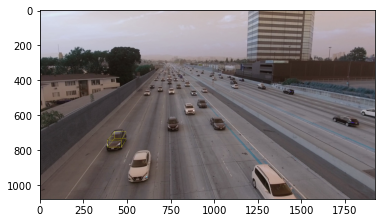

In [18]:
plt.imshow(img)

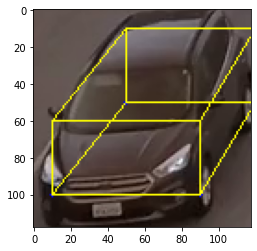

In [19]:
plt.imshow(img[y:y+h,x:x+h])

In [20]:
cap=cv2.VideoCapture('los_angeles.mp4')
img=cap.read()[1]
x,y,w,h=detections[1]
roi_org=img[y:y+h,x:x+h].copy()
roi=img[y:y+h,x:x+h]
#plt.imshow(roi)

gray_img=cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
g_blur_img=cv2.GaussianBlur(gray_img,(5,5),0)
edge_img=cv2.Canny(g_blur_img,25,25)
#isolated=region(edge_img)
lines = cv2.HoughLinesP(edge_img,2,np.pi/180,50, np.array([]), minLineLength=10, maxLineGap=5)
print(type(lines))

<class 'numpy.ndarray'>


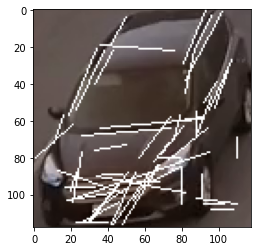

In [21]:
for line in lines:
    x1,y1,x2,y2=line[0]
    cv2.line(roi,(x1,y1),(x2,y2),(255,255,255),1)
plt.imshow(roi)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


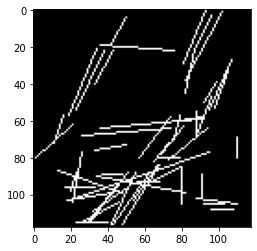

In [22]:
img_zeros=np.zeros(roi.shape)
for line in lines:
    x1,y1,x2,y2=line[0]
    cv2.line(img_zeros,(x1,y1),(x2,y2),(255,255,255),1)
plt.imshow(img_zeros)

In [23]:
roi.shape

(118, 118, 3)

In [24]:
import math
max_d=0
for line in lines:
    x1,y1,x2,y2=line[0]
    if math.dist((x1,y1),(x2,y2))>max_d:
        max_d=math.dist((x1,y1),(x2,y2))
        line_b=line

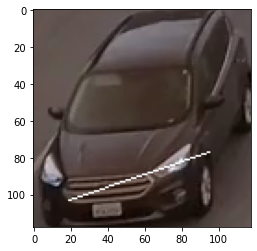

In [25]:
#img=roi.copy()
x1,y1,x2,y2=line_b[0]
cv2.line(roi_org,(x1,y1),(x2,y2),(255,255,255),1)
plt.imshow(roi_org)

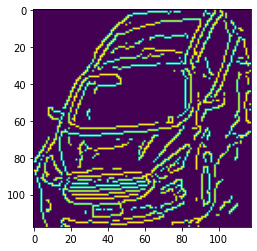

In [150]:
gray_img=cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
g_blur_img=cv2.GaussianBlur(gray_img,(5,5),0)
edge_img=cv2.Canny(g_blur_img,25,25)
plt.imshow(edge_img)

In [82]:
object_detector = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=40)

cap=cv2.VideoCapture('los_angeles.mp4')
while True:
    ret,frame=cap.read()
    
    if not ret:
        break
        
    
    
    mask=object_detector.apply(frame)
    _,mask=cv2.threshold(mask,254,255,cv2.THRESH_BINARY)
    
    
    cv2.imshow("Image",mask)

    if cv2.waitKey(1)==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

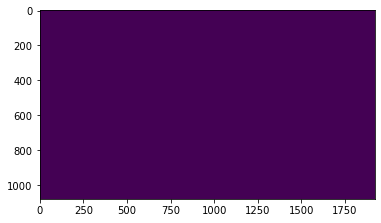

In [81]:
mask=object_detector.apply(img)
_,mask=cv2.threshold(mask,254,255,cv2.THRESH_BINARY)

plt.imshow(mask)